In [1]:
from pathlib import Path

In [2]:
# Setting the path 
data_path = Path('dataset.csv')

In [3]:
#Reading the Data and copying of the data to work on named as df
import pandas as pd
df_original = pd.read_csv(data_path)
df= df_original 


In [4]:
df.head(5)

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [5]:
df.shape

(91713, 85)

In [6]:
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object)

In [7]:
# Seperating the columns based on their data types.
original_categorical_cols = df.select_dtypes(include='object').columns
original_numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

## Stats part begins

In [8]:
df.columns

Index(['encounter_id', 'patient_id', 'hospital_id', 'age', 'bmi',
       'elective_surgery', 'ethnicity', 'gender', 'height', 'icu_admit_source',
       'icu_id', 'icu_stay_type', 'icu_type', 'pre_icu_los_days', 'weight',
       'apache_2_diagnosis', 'apache_3j_diagnosis', 'apache_post_operative',
       'arf_apache', 'gcs_eyes_apache', 'gcs_motor_apache',
       'gcs_unable_apache', 'gcs_verbal_apache', 'heart_rate_apache',
       'intubated_apache', 'map_apache', 'resprate_apache', 'temp_apache',
       'ventilated_apache', 'd1_diasbp_max', 'd1_diasbp_min',
       'd1_diasbp_noninvasive_max', 'd1_diasbp_noninvasive_min',
       'd1_heartrate_max', 'd1_heartrate_min', 'd1_mbp_max', 'd1_mbp_min',
       'd1_mbp_noninvasive_max', 'd1_mbp_noninvasive_min', 'd1_resprate_max',
       'd1_resprate_min', 'd1_spo2_max', 'd1_spo2_min', 'd1_sysbp_max',
       'd1_sysbp_min', 'd1_sysbp_noninvasive_max', 'd1_sysbp_noninvasive_min',
       'd1_temp_max', 'd1_temp_min', 'h1_diasbp_max', 'h1_diasbp_

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

NameError: name 'count_plot' is not defined

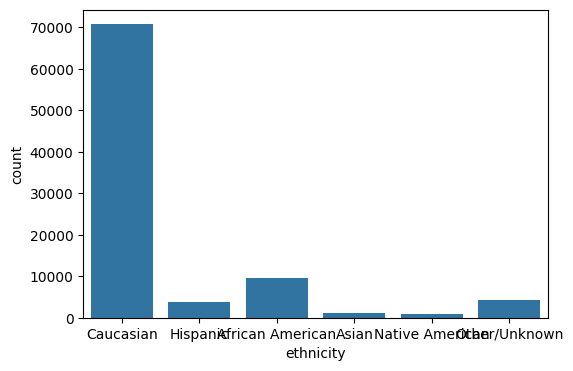

In [10]:
#Plot the categorical columns
for col in original_categorical_cols:
    plt.figure(figsize=(6,4))
    count_plot = sns.countplot(x=df[col])
    #rotate x-axis labels
    count_plot.set_xticklabels(count_plot.get_xticklabels(), rotation=45)

In [ ]:
#Plot Numerical columns
for col in original_numerical_cols:
    sns.histplot(df[col])
    plt.show()

In [ ]:
#Null Values Distribution
plt.figure(figsize=(15, 15))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title('Missing Values Distribution')
plt.show()


In [ ]:
# Seeing the columns with null values only:
def null_value_column(A):
    null_list = []
    for col in A.columns:
        if A[col].isnull().sum()>0:
            null_list.append(col)
    return null_list

In [ ]:
null_value_column(df)

In [ ]:
'''There exists a column that is unnamed so we don't know about the data.
So I am planning to drop it'''
unnamed_cols = df.columns[df.columns.str.contains('Unnamed')]
df.drop(unnamed_cols, axis=1, inplace=True)

In [ ]:
'''There are some columns which are not of that much use when we want to predict the Survival Rate,so dropping them at once'''
df.drop(['ethnicity', 'icu_admit_source', 'icu_id', 'icu_stay_type', 'icu_type', 'encounter_id', 'patient_id', 'hospital_id'], inplace=True, axis=1)

In [ ]:
# Seeing the percentage of missing values in each column and storing it in a dictionary:
def percentage_of_missing_values(A):
    num_rows = A.shape[0]
    results = {}
    for col in A.columns:
        null_count = A[col].isnull().sum()
        if null_count > 0:
            percentage = (null_count / num_rows) * 100
            final_percentage = round(percentage,2)
            results[col] = final_percentage
    return results



In [ ]:
missing_percent = percentage_of_missing_values(df)
print(missing_percent)

In [ ]:
# Min and Max values in the dict.
import numpy as np
min_val = min(missing_percent.values())
max_val = max(missing_percent.values())

# Finding all columns with min/max
min_cols = [col for col, val in missing_percent.items() if val == min_val]
max_cols = [col for col, val in missing_percent.items() if val == max_val]

print(f"The minimum value is {min_val}, appearing in columns: {', '.join(min_cols)}.")
print(f"The maximum value is {max_val}, appearing in columns: {', '.join(max_cols)}.")


In [ ]:
'''There are not much missing values so we can imputate the data with it's mean or can simply drop it.-->
So the plan is to make 2 seperate datasets -->
1. Dropped Values.
2. Imputation with its mean,mode for objects or strings'''



In [ ]:
df_dropped_values = df.copy()
df_imputated_values = df.copy()

In [ ]:
#Imputation with the mean for int,float types and mode for string types.
def imputation(A):
    for col in A.columns:
        if A[col].dtype in ['int64', 'float64']:
            A[col] = A[col].fillna(A[col].mean())
        else:
            A[col] = A[col].fillna(A[col].mode()[0])
    return A



In [ ]:
imputation(df_imputated_values)
df_imputated_values.to_csv('df_imputated_values.csv',index=False)

In [ ]:
df_imputated_values.shape

In [ ]:
#Dropping the values.
df_dropped_values = df_dropped_values.dropna()

In [ ]:
df_dropped_values.shape

In [ ]:
#One Hot encoding
categorical_cols = df_dropped_values.select_dtypes(include='object').columns
df_dropped_values = pd.get_dummies(df_dropped_values, columns=categorical_cols)

categorical_cols = df_imputated_values.select_dtypes(include='object').columns
df_imputated_values = pd.get_dummies(df_imputated_values, columns=categorical_cols)



In [ ]:
#Saving the dataframes.
df_dropped_values.to_csv('df_dropped_values.csv',index=False)
df_imputated_values.to_csv('df_imputated_values.csv',index=False)